In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

In [ ]:
cancer_df = pd.read_csv ("/content/kag_risk_factors_cervical_cancer.csv")
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
cancer_df.describe(include='all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,640.000000,640.000000,640.000000,640.000000,640,640,640.000000,640.000000,640,640.000000,...,640,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
unique,NaN,NaN,NaN,NaN,2,22,NaN,NaN,38,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,572,572,NaN,NaN,226,NaN,...,638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,27.140625,2.439062,17.156250,2.298437,NaN,NaN,0.106250,0.646875,NaN,0.110937,...,NaN,0.079687,0.025000,0.004687,0.023438,0.025000,0.046875,0.095312,0.060937,0.068750
std,8.715764,1.261953,2.837369,1.436174,NaN,NaN,0.308398,0.478315,NaN,0.314300,...,NaN,0.293209,0.156247,0.068358,0.151407,0.156247,0.211536,0.293876,0.239403,0.253226
min,13.000000,1.000000,10.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.750000,1.750000,15.000000,1.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,NaN,NaN,0.000000,1.000000,NaN,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,NaN,NaN,0.000000,1.000000,NaN,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
cancer_df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)

In [ ]:
cancer_df = cancer_df.replace('?', np.NaN)
cancer_df.dropna(inplace=True)

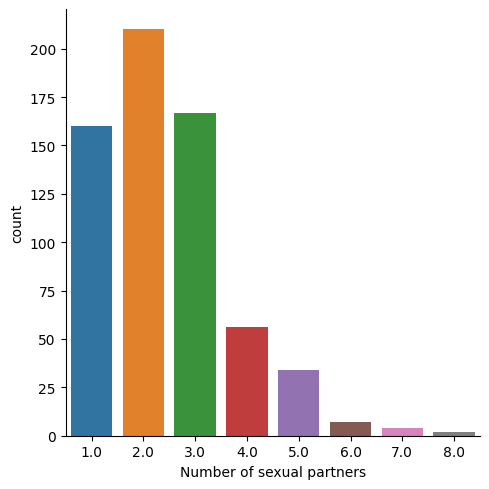

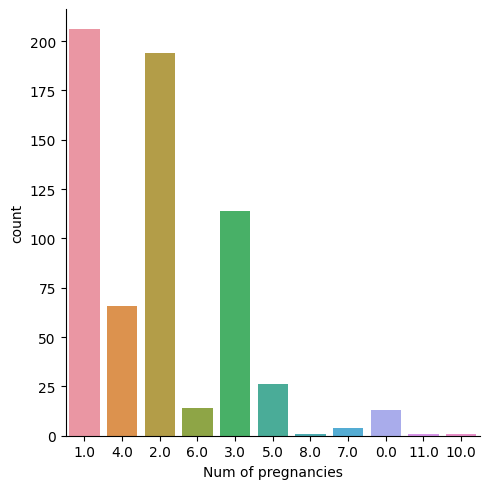

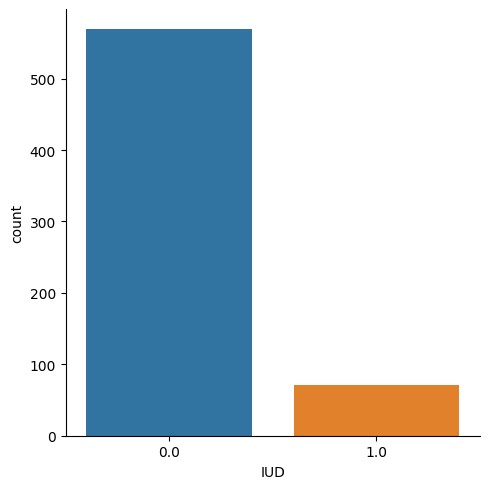

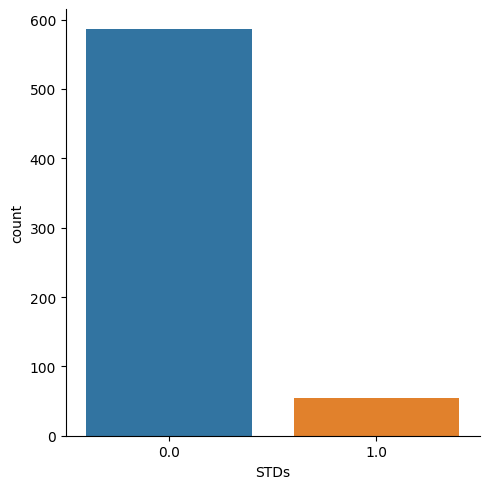

In [ ]:
sns.catplot(data=cancer_df, x='Number of sexual partners', kind='count')
sns.catplot(data=cancer_df, x='Num of pregnancies', kind='count')
sns.catplot(data=cancer_df, x='IUD', kind='count')
sns.catplot(data=cancer_df, x='STDs', kind='count')

In [ ]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS',
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN',
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

<Axes: xlabel='First sexual intercourse'>

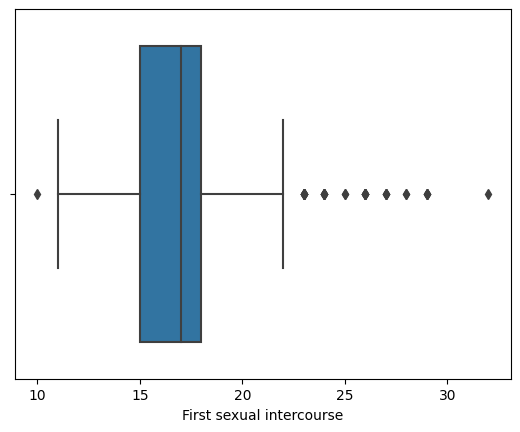

In [ ]:
cancer_df['Number of sexual partners'] = pd.to_numeric(cancer_df['Number of sexual partners'], errors='coerce')
cancer_df['Num of pregnancies'] = pd.to_numeric(cancer_df['Num of pregnancies'], errors='coerce')
cancer_df['First sexual intercourse'] = pd.to_numeric(cancer_df['First sexual intercourse'], errors='coerce')
cancer_df['IUD'] = pd.to_numeric(cancer_df['IUD'], errors='coerce')
cancer_df['Smokes (packs/year)'] = pd.to_numeric(cancer_df['Smokes (packs/year)'], errors='coerce')
cancer_df['STDs'] = pd.to_numeric(cancer_df['STDs'], errors='coerce')


# Filter numeric columns
numeric_df = cancer_df[cancer_df.select_dtypes(['number']).columns]



# Create FacetGrid

# Plot boxplots in one figure
sns.boxplot(data=numeric_df, x='First sexual intercourse')


In [ ]:
iso = IsolationForest(contamination=0.01)
iso.fit(cancer_df[['Number of sexual partners','Num of pregnancies','Smokes (packs/year)', 'STDs']])
cancer_df['outliers'] = iso.predict(cancer_df[['Number of sexual partners','Num of pregnancies','Smokes (packs/year)', 'STDs']])

# Stats on outliers
print(cancer_df['outliers'].value_counts())
print(cancer_df[cancer_df['outliers'] == -1].describe())

# Remove outliers
cancer_df = cancer_df[cancer_df['outliers'] != -1]
cancer_df = cancer_df.drop('outliers', axis=1)

# Validate distributions after outlier removal
print(cancer_df['Number of sexual partners'].describe())
print(cancer_df['Num of pregnancies'].describe())
print(cancer_df ['STDs'].describe())
print(cancer_df['Smokes (packs/year)'].describe())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 1    640
-1      7
Name: outliers, dtype: int64
             Age  STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV   Dx  \
count   7.000000                   7.000000        7.0     7.0     7.0  7.0   
mean   29.000000                   0.285714        0.0     0.0     0.0  0.0   
std     8.164966                   0.487950        0.0     0.0     0.0  0.0   
min    21.000000                   0.000000        0.0     0.0     0.0  0.0   
25%    23.000000                   0.000000        0.0     0.0     0.0  0.0   
50%    27.000000                   0.000000        0.0     0.0     0.0  0.0   
75%    33.000000                   0.500000        0.0     0.0     0.0  0.0   
max    43.000000                   1.000000        0.0     0.0     0.0  0.0   

       Hinselmann  Schiller  Citology    Biopsy  outliers  
count         7.0  7.000000       7.0  7.000000       7.0  
mean          0.0  0.142857       0.0  0.142857      -1.0  
std           0.0  0.377964       0.0  0.377964       0.0  

Mean age of the Women facing the risk of Cervical cancer 27.140625


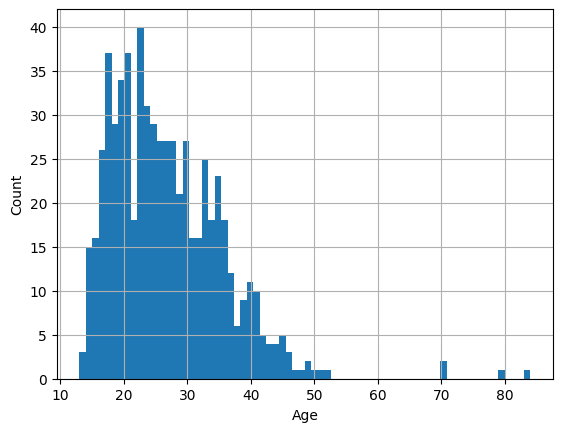

In [ ]:
cancer_df['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Count')
print('Mean age of the Women facing the risk of Cervical cancer',cancer_df['Age'].mean())

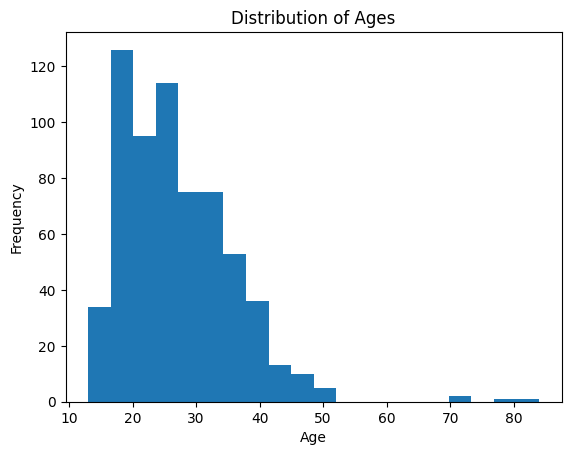

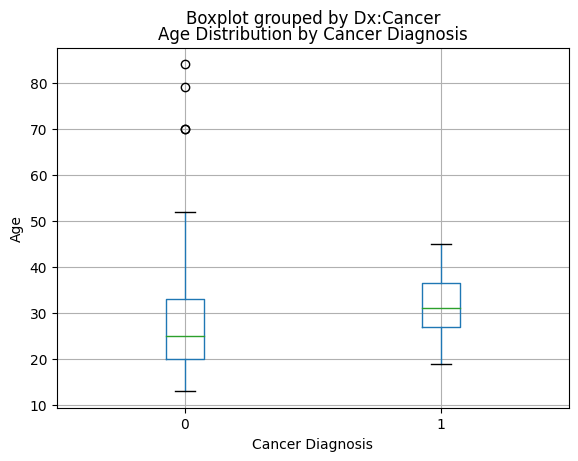

In [ ]:
# Histogram of Ages
plt.hist(cancer_df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

# Boxplot of Ages by Cancer Diagnosis
cancer_df.boxplot(by='Dx:Cancer', column='Age')

plt.xlabel('Cancer Diagnosis')
plt.ylabel('Age')
plt.title('Age Distribution by Cancer Diagnosis')
plt.show()

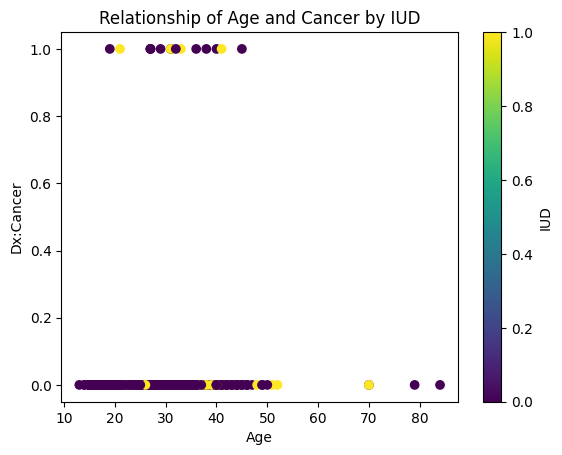

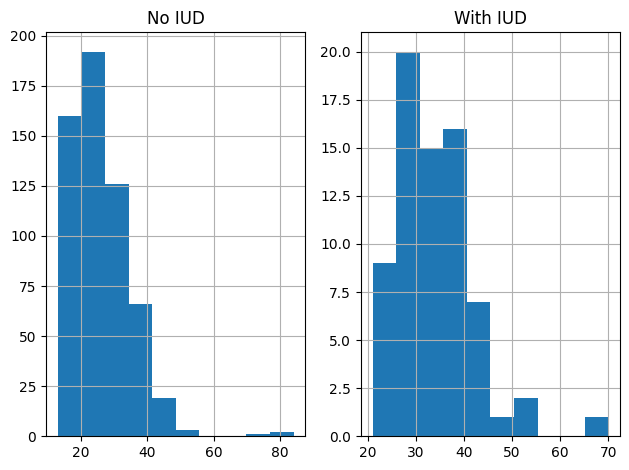

In [ ]:
plt.scatter(cancer_df['Age'], cancer_df['Dx:Cancer'], c=cancer_df['IUD'])
plt.colorbar(label='IUD')
plt.xlabel('Age')
plt.ylabel('Dx:Cancer')
plt.title('Relationship of Age and Cancer by IUD')

# Histograms by IUD
fig, axs = plt.subplots(1, 2, tight_layout=True)
cancer_df[cancer_df['IUD']==0]['Age'].hist(ax=axs[0])
axs[0].set_title('No IUD')
cancer_df[cancer_df['IUD']==1]['Age'].hist(ax=axs[1])
axs[1].set_title('With IUD')

plt.show()

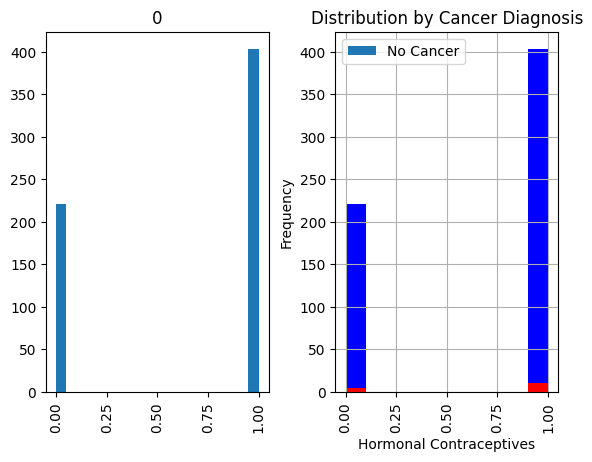

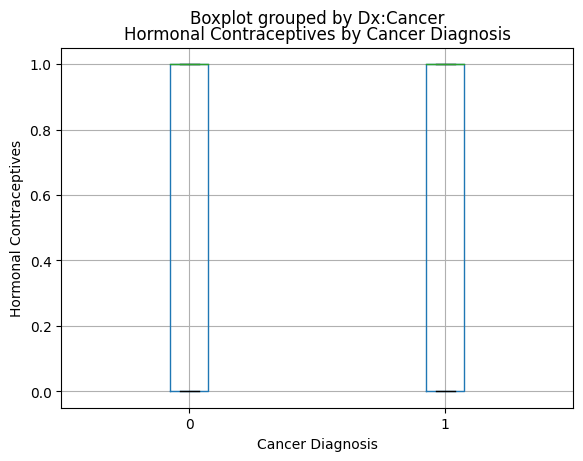

In [ ]:
cancer_df = cancer_df[pd.to_numeric(cancer_df['Hormonal Contraceptives'], errors='coerce').notnull()]
cancer_df['Hormonal Contraceptives'].hist(by=cancer_df['Dx:Cancer'], bins=20)
plt.xlabel('Hormonal Contraceptives')
plt.ylabel('Frequency')
plt.legend(['No Cancer', 'Cancer'])
no_cancer = cancer_df[cancer_df['Dx:Cancer'] == 0]
cancer = cancer_df[cancer_df['Dx:Cancer'] == 1]
no_cancer['Hormonal Contraceptives'].hist(color='blue')
cancer['Hormonal Contraceptives'].hist(color='red')
plt.title('Distribution by Cancer Diagnosis')

# Boxplot
cancer_df['Hormonal Contraceptives'] = pd.to_numeric(cancer_df['Hormonal Contraceptives'], errors='coerce')
cancer_df.boxplot(column='Hormonal Contraceptives', by='Dx:Cancer')
plt.xlabel('Cancer Diagnosis')
plt.ylabel('Hormonal Contraceptives')
plt.title('Hormonal Contraceptives by Cancer Diagnosis')

plt.show()